<a href="https://colab.research.google.com/github/abhiiyer/Checking_Repo/blob/master/Assignment6/EVA_Assignment6B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

###################################### Max accuracy achieved is 78.61% during epoch 97/100 ##############################################

## Dependencies
from keras.models import Model, Input, Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Activation, Flatten
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.datasets import cifar10

## Loading the dataset:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.
x_test = x_test / 255.
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

input_shape = x_train[0,:,:,:].shape
print("Input shape is ",input_shape)

model_input = Input(shape=input_shape)

#mlpconv block1
x = Conv2D(32, (5, 5), activation='relu',padding='valid')(model_input)
x = Conv2D(32, (1, 1), activation='relu')(x)
x = Conv2D(32, (1, 1), activation='relu')(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.5)(x)

#mlpconv block2
x = Conv2D(64, (3, 3), activation='relu',padding='valid')(x)
x = Conv2D(64, (1, 1), activation='relu')(x)
x = Conv2D(64, (1, 1), activation='relu')(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.5)(x)

#mlpconv block3
x = Conv2D(128, (3, 3), activation='relu',padding='valid')(x)
x = Conv2D(32, (1, 1), activation='relu')(x)
x = Conv2D(10, (1, 1), activation='relu')(x)

x = Conv2D(10, (4, 4), activation='relu')(x)
x = Flatten()(x)
#x = GlobalAveragePooling2D()(x)
x = Activation(activation='softmax')(x)


model = Model(model_input, x, name='Assignment6B_Normal Convolution')
model.summary()

model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['acc']) 

#_ = model.fit(x=x_train, y=y_train, batch_size=32, epochs=200, verbose=1,validation_split=0.2)

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step
Input shape is  (32, 32, 3)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        1056      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        1056      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0  

Epoch 1/100
  6/781 [..............................] - ETA: 19s - loss: 0.7937 - acc: 0.7161 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=781, epochs=100)`


781/781 [==============================] - 8s 10ms/step - loss: 0.8338 - acc: 0.7064 - val_loss: 0.7610 - val_acc: 0.7340
Epoch 2/100
781/781 [==============================] - 7s 10ms/step - loss: 0.8153 - acc: 0.7111 - val_loss: 0.7983 - val_acc: 0.7217
Epoch 3/100
781/781 [==============================] - 7s 10ms/step - loss: 0.8021 - acc: 0.7162 - val_loss: 0.7919 - val_acc: 0.7259
Epoch 4/100
781/781 [==============================] - 7s 10ms/step - loss: 0.8006 - acc: 0.7158 - val_loss: 0.7966 - val_acc: 0.7222
Epoch 5/100
781/781 [==============================] - 7s 9ms/step - loss: 0.8002 - acc: 0.7169 - val_loss: 0.7865 - val_acc: 0.7289
Epoch 6/100
781/781 [==============================] - 7s 9ms/step - loss: 0.7902 - acc: 0.7212 - val_loss: 0.8959 - val_acc: 0.6836
Epoch 7/100
781/781 [==============================] - 7s 9ms/step - loss: 0.7845 - acc: 0.7228 - val_loss: 0.7897 - val_acc: 0.7213
Epoch 8/100
781/781 [==============================] - 7s 9ms/step - loss: 0.

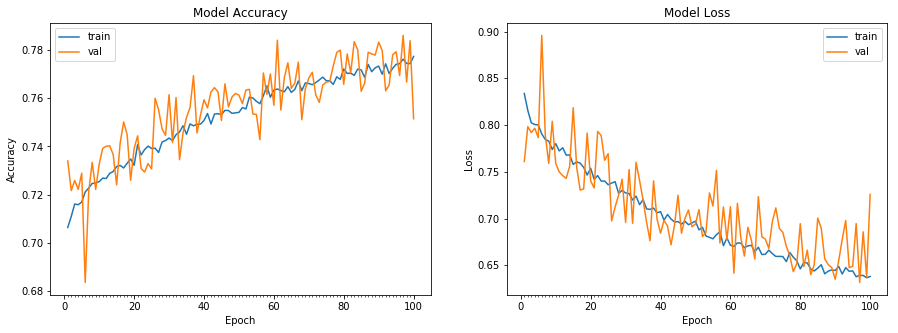

In [9]:
from keras.preprocessing.image import ImageDataGenerator
import time
from matplotlib import pyplot as plt
from keras.utils import np_utils
import numpy as np


datagen = ImageDataGenerator()


def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    

def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)
  
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(x_train, y_train, batch_size = 64),
                                 samples_per_epoch = x_train.shape[0], nb_epoch = 100, 
                                 validation_data = (x_test, y_test), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

# plot model history
plot_model_history(model_info)


In [10]:
print ("Accuracy on test data is: %0.2f"%accuracy(x_test, y_test, model))

Accuracy on test data is: 75.15
